Преподаватель: Алексей Кузьмин

Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb).   

Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.  

На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.  

Решение задачи можете найти в этой статье - https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/. Там указан необходимый лосс и градиент"


In [104]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [105]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

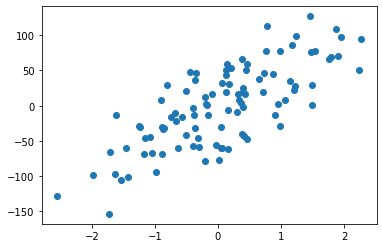

In [106]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [107]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [108]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [109]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

In [110]:
# шаг алгоритма
alpha = 0.01

# линейной классификации

In [8]:
def gradient_descent_linear_class(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [9]:
%%time
theta = gradient_descent_linear_class(alpha, x, y, 1000)

Wall time: 36 ms


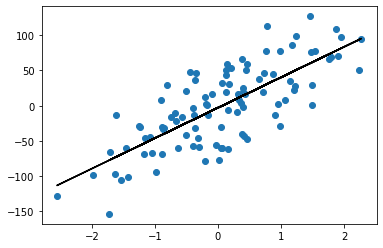

In [10]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

# логистической регрессии

In [111]:
def gradient_descent_logregr(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = 1/(1+np.exp(-1*(np.dot(x, theta)))) # сигмоида от матричного произведения
        
        loss = -(1 / m) * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))

# расчет accuracy модели
        correct = 0
        length = len(x)
        prediction = (1/(1+np.exp(-1*(np.dot(x, theta)))) > 0.5)
        _y = (y > .5).astype(int)
        correct = prediction == _y
        my_accuracy = (np.sum(correct) / length)*100
        print ('LR Accuracy %: ', my_accuracy)
#         print(iter, loss)
        
        gradient = (1 / m) * np.dot(x.T, hypothesis - y)       
        theta = theta - alpha * gradient  # update
    
    return theta

In [112]:
%%time
theta = gradient_descent_logregr(alpha, x, y, 100)

LR Accuracy %:  67.0
LR Accuracy %:  71.0
LR Accuracy %:  75.0
LR Accuracy %:  74.0
LR Accuracy %:  77.0
LR Accuracy %:  78.0
LR Accuracy %:  78.0
LR Accuracy %:  78.0
LR Accuracy %:  77.0
LR Accuracy %:  77.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  77.0
LR Accuracy %:  77.0
LR Accuracy %:  77.0
LR Accuracy %:  77.0
LR Accuracy %:  77.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %:  76.0
LR Accuracy %

<ipython-input-111-f9c0a73545ab>:13: RuntimeWarning: divide by zero encountered in log
  loss = -(1 / m) * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


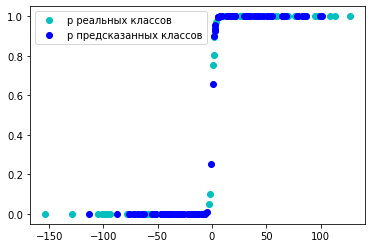

In [113]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 

# посчитаем сигомоиду для предсказаний (определим вероятность классов)
p = []

for fx in y_predict.T[1]:
    logit = 1/(1+np.exp(-1*fx))
    p.append(logit)

# посчитаем сигомоиду для исходных значений определим вероятность классов)
p_original = []

for fx in y:
    logit = 1/(1+np.exp(-1*fx))
    p_original.append(logit)
    
# рисуем результат
pylab.plot(y,p_original,'o', color='c', label='p реальных классов')
pylab.plot(y_predict.T[1],p,'o', color='b', label='p предсказанных классов')
pylab.legend(loc='upper left')
pylab.show()